In [3]:
import matplotlib.pyplot as plt

from neural_astar.planner import NeuralAstar
from neural_astar.utils.data_maps import create_dataloader
from neural_astar.utils.training import load_from_ptl_checkpoint



In [4]:

from neural_astar.utils.data_maps import visualize_results_voronoi
from neural_astar.utils.data import visualize_results


dataloader = create_dataloader("../src/neural_astar/utils/voronoi_utilities/maps_data/maps", "train_resized", 1)
map_designs, start_maps, goal_maps, opt_trajs, _ = next(iter(dataloader))





torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])
torch.Size([10, 1, 700, 700])


torch.Size([1, 1, 700, 700])


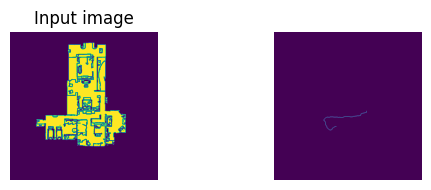

In [5]:
print(start_maps.shape)

t = 0
fig, axes = plt.subplots(1, 2, figsize=[6, 2])
axes[0].imshow(map_designs[t][0])
axes[0].axis("off")
axes[1].imshow(opt_trajs[t, 0])
axes[0].set_title("Input image")
axes[1].axis("off")

fig.tight_layout()

In [ ]:
model = NeuralAstar(encoder_arch="CNN").to("cuda")
model.load_state_dict(load_from_ptl_checkpoint("../model/maps/lightning_logs/version_9"))

load ../model/maps/lightning_logs/version_9/checkpoints/epoch=8-step=153.ckpt


<All keys matched successfully>

/home/mastrelli/neural-astar/.venv/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


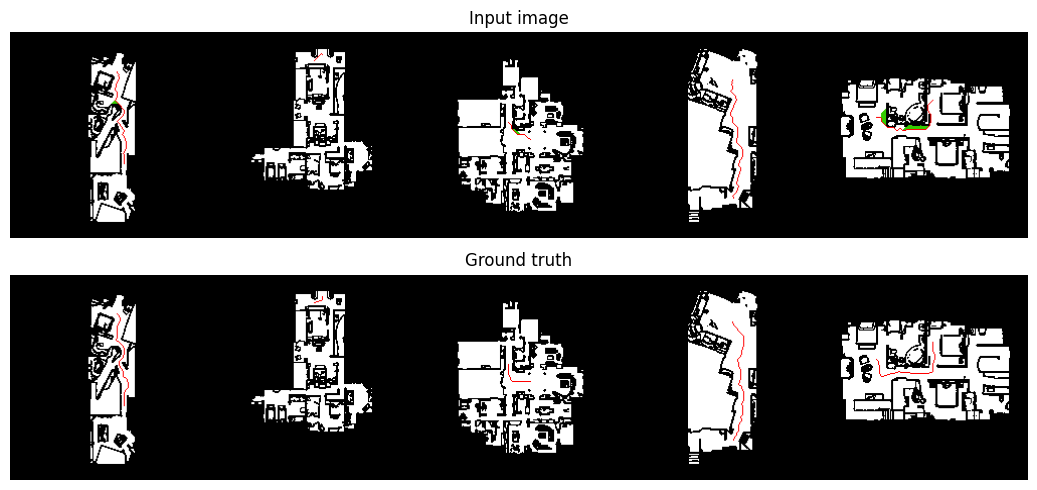

In [ ]:
outputs = model(map_designs.to("cuda"), start_maps.to("cuda"), goal_maps.to("cuda"))

t = 0
fig, axes = plt.subplots(2, 1, figsize=[15, 5])

axes[0].imshow(visualize_results(map_designs, outputs))
axes[0].axis("off")
axes[0].set_title("Input image")
axes[1].imshow(visualize_results_voronoi(map_designs, opt_trajs))
axes[1].set_title("Ground truth")
axes[1].axis("off")

fig.tight_layout()